In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


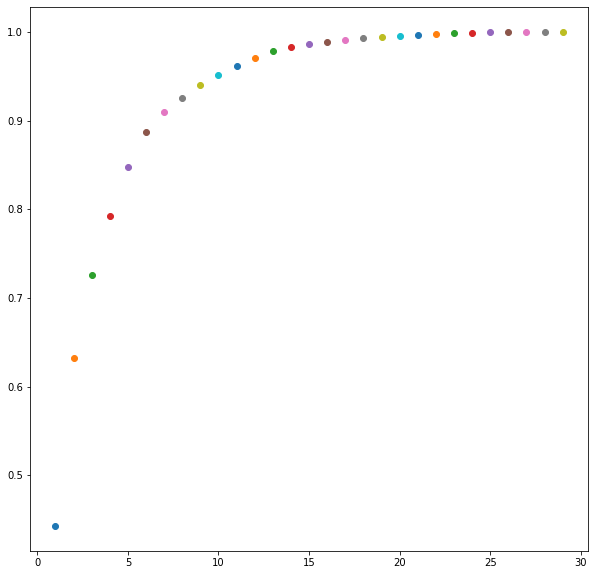

In [10]:
#累積寄与率を描画
fig, ax = plt.subplots(figsize=(10,10))
for i in range(X.shape[1]-1):
    pca = PCA(n_components=i+1)
    pca.fit(X_scaled)
    ax.scatter(i+1, pca.explained_variance_ratio_.sum())

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
print(X_scaled.shape)
pca = PCA(n_components=14)
p_X = pca.fit_transform(X_scaled)
print(p_X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(p_X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(logreg.score(X_train, Y_train))
print(logreg.score(X_test, Y_test))

(569, 30)
(569, 14)
0.9906103286384976
0.958041958041958


In [14]:
print(X_scaled.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(logreg.score(X_train, Y_train))
print(logreg.score(X_test, Y_test))

(569, 30)
0.9906103286384976
0.965034965034965
